Enter the number of nodes in the graph (up to 100): 4
Enter adjacency matrix for the graph (1 for edge, 0 for no edge):
1 0 1 0
0 0 1 0
1 1 0 1
0 1 1 0
Enter the number of seed nodes (up to 4): 1
Enter the ID of seed node 1 (0 to 3): 2
Enter the infection probability (0 to 1): 0.5
Total Nodes: 4
Infected Nodes: 4
Data Loss Percentage: 0.00%


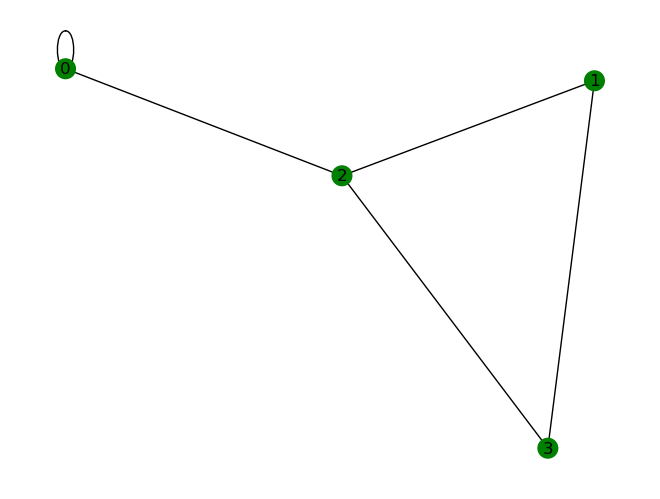

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

MAX_NODES = 100

class Graph:
    def __init__(self, node_num):
        self.node_num = node_num
        self.graph = nx.Graph()
        self.nodes = {i: {'infected': False} for i in range(node_num)}
        self.edges = [[] for _ in range(node_num)]

    def adj_matrix(self):
        print("Enter adjacency matrix for the graph (1 for edge, 0 for no edge):")
        for i in range(self.node_num):
            row = list(map(int, input().split()))
            for j in range(self.node_num):
                if row[j] == 1:
                    self.graph.add_edge(i, j)

    def seed(self, seed_num):
        seed_nodes = []
        for i in range(seed_num):
            while True:
                node = int(input(f"Enter the ID of seed node {i + 1} (0 to {self.node_num - 1}): "))
                if 0 <= node < self.node_num:
                    seed_nodes.append(node)
                    break
                else:
                    print(f"Invalid node ID. Please enter a valid node ID between 0 and {self.node_num - 1}.")
        return seed_nodes

    def independent_cascade(self, seed_nodes, infection):
        new_infect = [0] * self.node_num
        for node in seed_nodes:
            self.nodes[node]['infected'] = True

        while True:
            any_new_infections = False

            for i in range(self.node_num):
                if self.nodes[i]['infected']:
                    for j in self.graph[i]:
                        if not self.nodes[j]['infected']:
                            random_value = random.random()
                            if random_value < infection:
                                new_infect[j] = 1
                                any_new_infections = True

            if not any_new_infections:
                break

            for i in range(self.node_num):
                if new_infect[i]:
                    self.nodes[i]['infected'] = True
                    new_infect[i] = 0

    def visualize_graph(self):
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, node_size=200, node_color=['g' if self.nodes[node]['infected'] else 'r' for node in self.graph.nodes])
        plt.show()

def main():
    random.seed()
    node_num = int(input(f"Enter the number of nodes in the graph (up to {MAX_NODES}): "))
    if node_num < 1 or node_num > MAX_NODES:
        print(f"Invalid number of nodes. Please enter a valid number between 1 and {MAX_NODES}.")
        return

    graph = Graph(node_num)
    graph.adj_matrix()

    seed_num = int(input(f"Enter the number of seed nodes (up to {node_num}): "))
    if seed_num < 1 or seed_num > node_num:
        print(f"Invalid number of seed nodes. Please enter a valid number between 1 and {node_num}.")
        return

    seed_nodes = graph.seed(seed_num)

    infection = float(input("Enter the infection probability (0 to 1): "))
    if infection < 0 or infection > 1:
        print("Invalid infection probability. Please enter a valid probability between 0 and 1.")
        return

    graph.independent_cascade(seed_nodes, infection)

    total_nodes = node_num
    infected_nodes = sum(1 for node in graph.nodes.values() if node['infected'])
    data_loss_percentage = ((total_nodes - infected_nodes) / total_nodes) * 100.0

    print(f"Total Nodes: {total_nodes}")
    print(f"Infected Nodes: {infected_nodes}")
    print(f"Data Loss Percentage: {data_loss_percentage:.2f}%")

    graph.visualize_graph()

if __name__ == "__main__":
    main()

